In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline


# Import and check datasets

In [2]:
movie_data=pd.read_csv('movies.dat',sep="::",names=['MovieID','Title','Genres']
                       ,engine='python'
                       ,encoding='unicode_escape')

movie_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   int64 
 1   Title    3883 non-null   object
 2   Genres   3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [3]:
users_data=pd.read_csv('users.dat',sep="::",names=['UserID','Gender','Age','Occupation','Zip-code'],dtype={'Zip-code':str} ,engine='python'
                       ,encoding='unicode_escape')

users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   int64 
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   int64 
 3   Occupation  6040 non-null   int64 
 4   Zip-code    6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB


In [4]:
ratings_data= pd.read_csv("ratings.dat",
                       sep="::", names=['UserID','MovieID','Rating','Timestamp'],dtype={'Timestamp':str,'UserID':np.int32},engine='python')
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   UserID     1000209 non-null  int32 
 1   MovieID    1000209 non-null  int64 
 2   Rating     1000209 non-null  int64 
 3   Timestamp  1000209 non-null  object
dtypes: int32(1), int64(2), object(1)
memory usage: 26.7+ MB


# Create a new dataset Master_Data

In [5]:
data1=pd.merge(users_data,ratings_data,how='left',left_on='UserID',right_on='UserID')
data2=pd.merge(movie_data,data1,how='left', left_on=['MovieID'], right_on=['MovieID'])
data2.head()






,MovieID,Title,Genres,UserID,Gender,Age,Occupation,Zip-code,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1.0,F,1.0,10.0,48067,5.0,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6.0,F,50.0,9.0,55117,4.0,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8.0,M,25.0,12.0,11413,4.0,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9.0,M,25.0,17.0,61614,5.0,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10.0,F,35.0,1.0,95370,5.0,978226474


In [6]:
Master_Data=data2[['MovieID','Title','UserID','Gender','Occupation','Age','Rating']]
Master_Data.head()
#Master_Data.tail()

,MovieID,Title,UserID,Gender,Occupation,Age,Rating
0,1,Toy Story (1995),1.0,F,10.0,1.0,5.0
1,1,Toy Story (1995),6.0,F,9.0,50.0,4.0
2,1,Toy Story (1995),8.0,M,12.0,25.0,4.0
3,1,Toy Story (1995),9.0,M,17.0,25.0,5.0
4,1,Toy Story (1995),10.0,F,1.0,35.0,5.0


In [7]:
Master_Data.isnull().sum()

MovieID         0
Title           0
UserID        177
Gender        177
Occupation    177
Age           177
Rating        177
dtype: int64

In [8]:
Master_Data.dropna(inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17316\2591516899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Master_Data.dropna(inplace=True)


# User Age Distribution

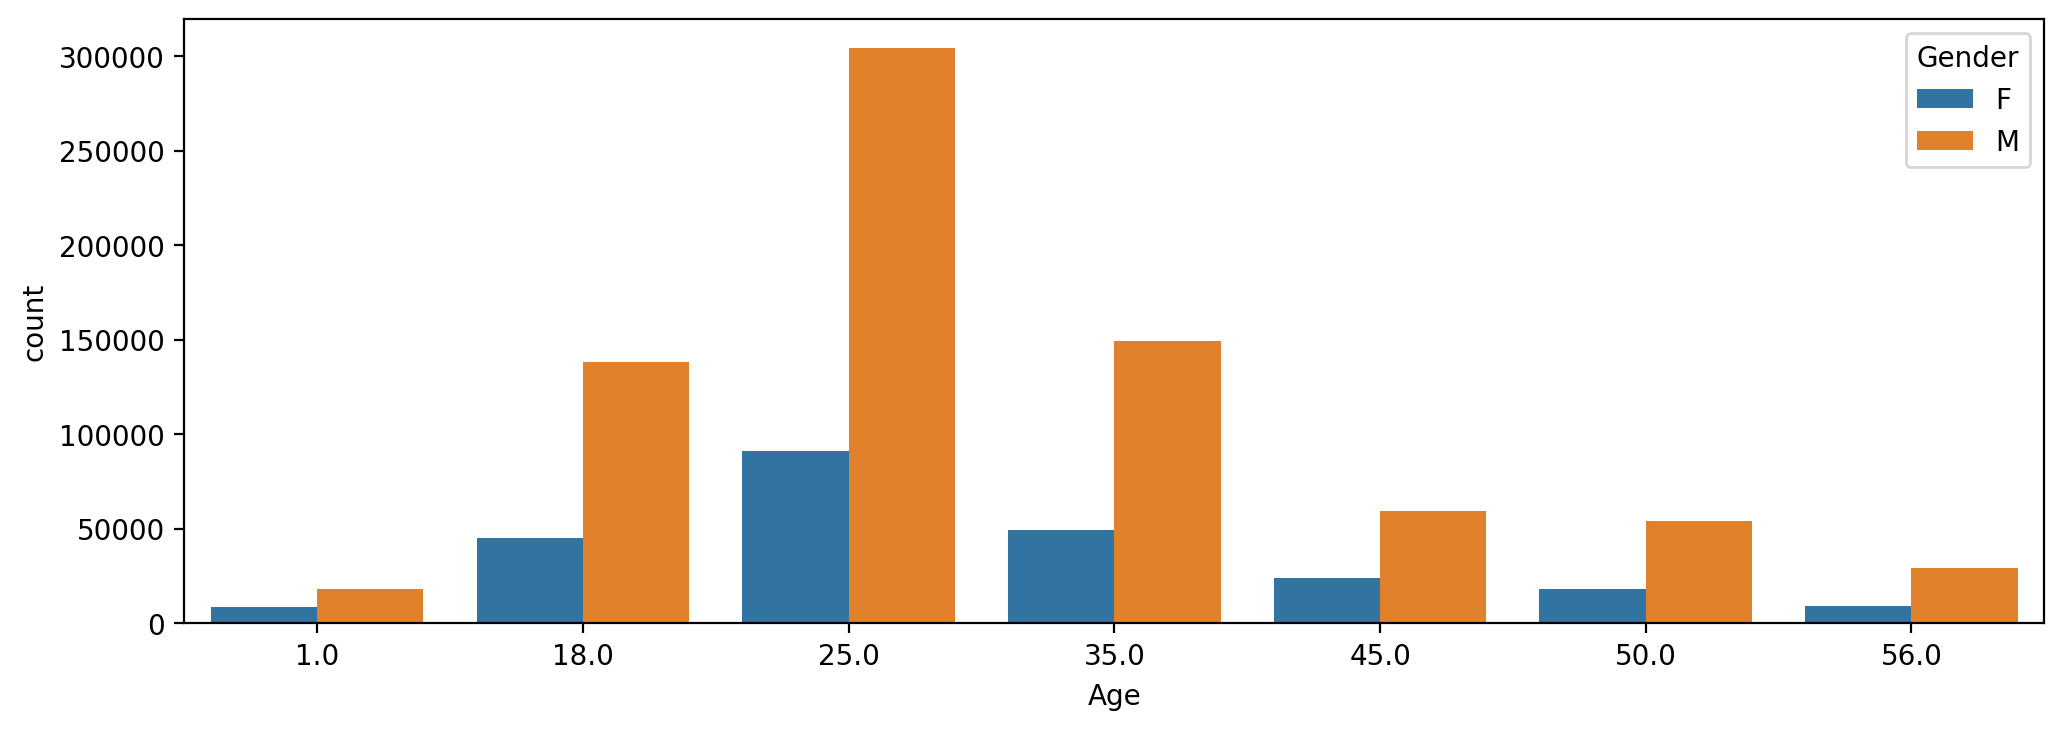

In [9]:
plt.figure(figsize=(12,4),dpi=200)
sns.countplot(data=Master_Data,x='Age',hue='Gender');


Maximum users are in the age group of 25-34,least number of users are in the under 18 age group.The users are mostly of male gender.

# User rating of the movie “Toy Story”

In [10]:
toy_story_rt=Master_Data[Master_Data['Title']=='Toy Story (1995)']
rating=toy_story_rt.groupby('Rating').size()
rating


Rating
1.0     16
2.0     61
3.0    345
4.0    835
5.0    820
dtype: int64

<AxesSubplot:title={'center':'Rating of the movie “Toy Story”'}, xlabel='Rating'>

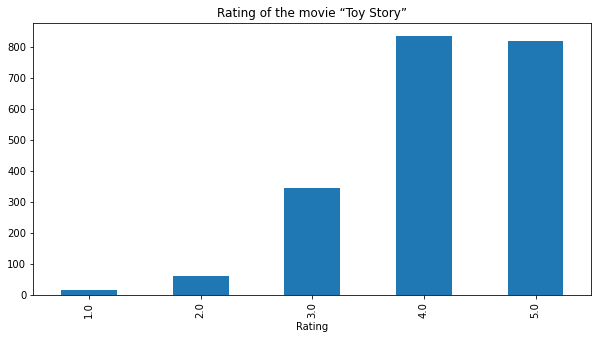

In [11]:
rating.plot(kind='bar',title='Rating of the movie “Toy Story”',figsize=(10,5))


The rating of the movie lies in the range of 4 to 5.Fewer number of people have given rating of 1 to 2.

# Top 25 movies by viewership rating

In [12]:
Master_Data['Title'].value_counts()

American Beauty (1999)                                      3428
Star Wars: Episode IV - A New Hope (1977)                   2991
Star Wars: Episode V - The Empire Strikes Back (1980)       2990
Star Wars: Episode VI - Return of the Jedi (1983)           2883
Jurassic Park (1993)                                        2672
                                                            ... 
Kestrel's Eye (Falkens öga) (1998)                             1
Last of the High Kings, The (a.k.a. Summer Fling) (1996)       1
Condition Red (1995)                                           1
Beauty (1998)                                                  1
Soft Toilet Seats (1999)                                       1
Name: Title, Length: 3706, dtype: int64

In [13]:
d2=Master_Data[['Title','Rating']]
top_25_movies=d2.groupby('Title')['Rating'].mean().fillna(0).sort_values(ascending=False)
top_25_movies.head(26).to_frame().reset_index()

,Title,Rating
0,Ulysses (Ulisse) (1954),5.000000
1,Lured (1947),5.000000
2,Follow the Bitch (1998),5.000000
3,Bittersweet Motel (2000),5.000000
4,Song of Freedom (1936),5.000000
5,One Little Indian (1973),5.000000
6,Smashing Time (1967),5.000000
7,Schlafes Bruder (Brother of Sleep) (1995),5.000000
8,"Gate of Heavenly Peace, The (1995)",5.000000
9,"Baby, The (1973)",5.000000


# user id = 2696

In [14]:
Master_Data1=Master_Data[['UserID','Title','Rating','MovieID']]
user_2696=Master_Data1[Master_Data1['UserID']==2696]
rating_by_userid2696=user_2696[['Title','Rating','MovieID']]

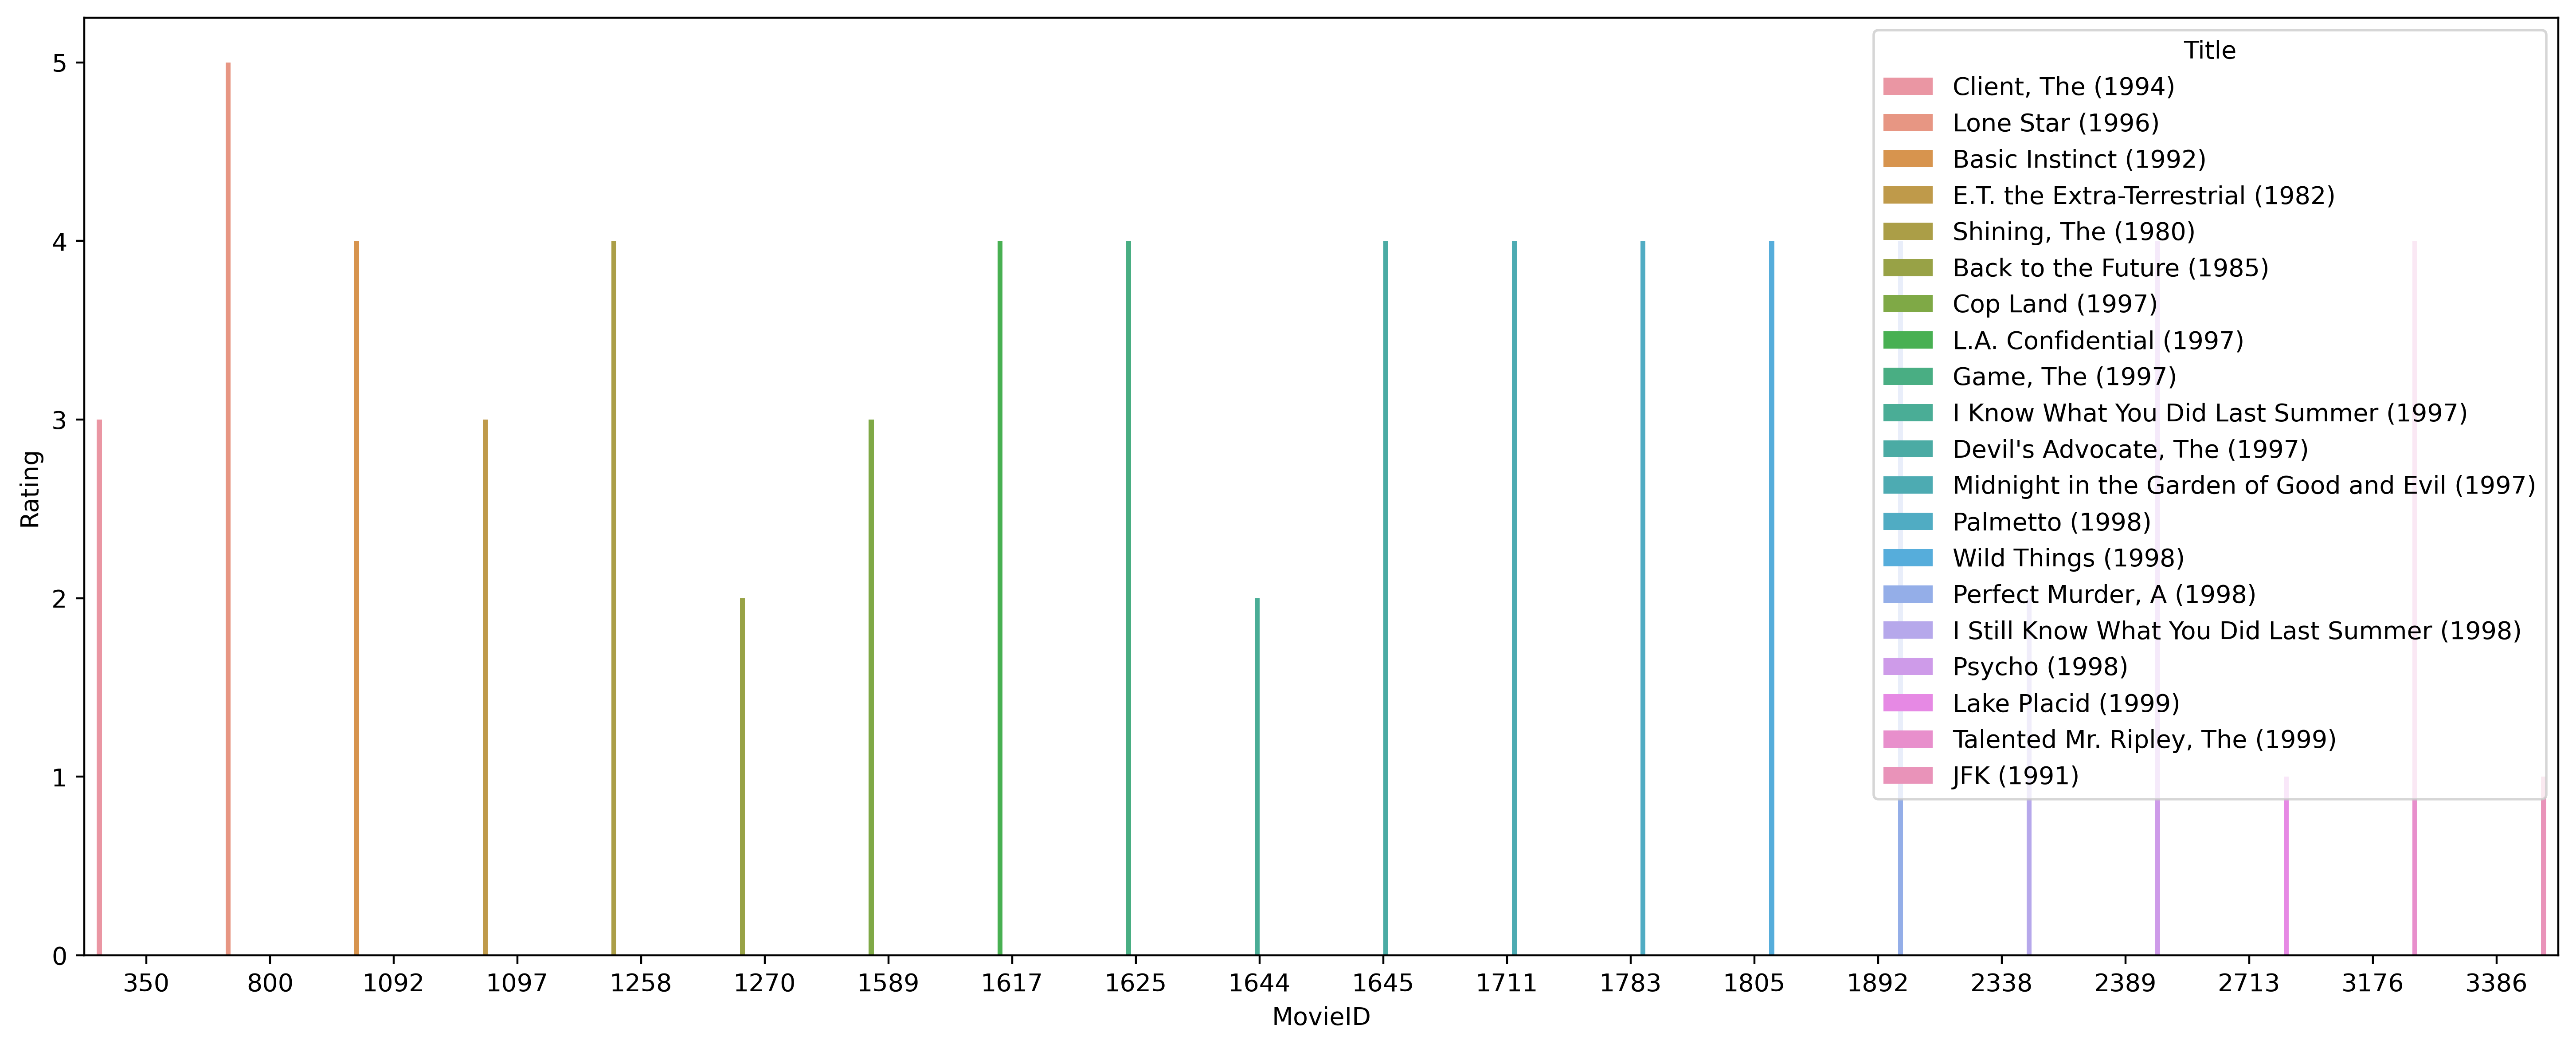

In [15]:
plt.figure(figsize=(18,7),dpi=400)
sns.barplot(x='MovieID',y='Rating',data=rating_by_userid2696,hue='Title',);


# Feature Engineering

# 1.unique genres:

In [16]:
movie_data

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [17]:
def unique(val):
    return str(val.replace("|",","))

In [18]:
data2['Genres']=data2['Genres'].map(unique)

In [19]:
data2

,MovieID,Title,Genres,UserID,Gender,Age,Occupation,Zip-code,Rating,Timestamp
0,1,Toy Story (1995),"Animation,Children's,Comedy",1.0,F,1.0,10.0,48067,5.0,978824268
1,1,Toy Story (1995),"Animation,Children's,Comedy",6.0,F,50.0,9.0,55117,4.0,978237008
2,1,Toy Story (1995),"Animation,Children's,Comedy",8.0,M,25.0,12.0,11413,4.0,978233496
3,1,Toy Story (1995),"Animation,Children's,Comedy",9.0,M,25.0,17.0,61614,5.0,978225952
4,1,Toy Story (1995),"Animation,Children's,Comedy",10.0,F,35.0,1.0,95370,5.0,978226474
...,...,...,...,...,...,...,...,...,...,...
1000381,3952,"Contender, The (2000)","Drama,Thriller",5812.0,F,25.0,7.0,92120,4.0,992072099
1000382,3952,"Contender, The (2000)","Drama,Thriller",5831.0,M,25.0,1.0,92120,3.0,986223125
1000383,3952,"Contender, The (2000)","Drama,Thriller",5837.0,M,25.0,7.0,60607,4.0,1011902656
1000384,3952,"Contender, The (2000)","Drama,Thriller",5927.0,M,35.0,14.0,10003,1.0,979852537


In [20]:
movie_data1=movie_data['Genres'].str.split("|")
movie_data2=movie_data1.tolist()
movie_data2

[['Animation', "Children's", 'Comedy'],
 ['Adventure', "Children's", 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama'],
 ['Comedy'],
 ['Action', 'Crime', 'Thriller'],
 ['Comedy', 'Romance'],
 ['Adventure', "Children's"],
 ['Action'],
 ['Action', 'Adventure', 'Thriller'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy', 'Horror'],
 ['Animation', "Children's"],
 ['Drama'],
 ['Action', 'Adventure', 'Romance'],
 ['Drama', 'Thriller'],
 ['Drama', 'Romance'],
 ['Thriller'],
 ['Comedy'],
 ['Action'],
 ['Action', 'Comedy', 'Drama'],
 ['Crime', 'Drama', 'Thriller'],
 ['Thriller'],
 ['Drama', 'Sci-Fi'],
 ['Drama', 'Romance'],
 ['Drama'],
 ['Drama'],
 ['Romance'],
 ['Adventure', 'Sci-Fi'],
 ['Drama'],
 ['Drama'],
 ['Drama', 'Sci-Fi'],
 ['Adventure', 'Romance'],
 ["Children's", 'Comedy', 'Drama'],
 ['Drama', 'Romance'],
 ['Drama'],
 ['Documentary'],
 ['Comedy'],
 ['Comedy', 'Romance'],
 ['Drama'],
 ['Drama', 'War'],
 ['Action', 'Crime', 'Drama'],
 ['Drama'],
 ['Action', 'Adventure'],
 ['Comedy'

In [21]:
movie_data3=list(np.concatenate(movie_data2))
unique_list=np.unique(movie_data3)
unique_list


array(['Action', 'Adventure', 'Animation', "Children's", 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'], dtype='<U11')

# 2.One Hot Encoding:

# creating columns for each genre using one hot encoding

In [22]:
data2.columns

Index(['MovieID', 'Title', 'Genres', 'UserID', 'Gender', 'Age', 'Occupation',
       'Zip-code', 'Rating', 'Timestamp'],
      dtype='object')

In [23]:
df=data2.drop(['MovieID','Title','UserID','Zip-code','Timestamp'],axis=1)
df.head()

,Genres,Gender,Age,Occupation,Rating
0,"Animation,Children's,Comedy",F,1.0,10.0,5.0
1,"Animation,Children's,Comedy",F,50.0,9.0,4.0
2,"Animation,Children's,Comedy",M,25.0,12.0,4.0
3,"Animation,Children's,Comedy",M,25.0,17.0,5.0
4,"Animation,Children's,Comedy",F,35.0,1.0,5.0


In [24]:
#df=df.assign(Genres=df['Genres'].str.split(','))
#df

In [25]:
df1=df[:10000]
df1=pd.get_dummies(df1,drop_first=True)


In [26]:
X=df1.drop('Rating',axis=1)
X.head()

,Age,Occupation,"Genres_Action,Adventure,Romance","Genres_Action,Adventure,Thriller","Genres_Action,Comedy,Drama","Genres_Action,Crime,Thriller","Genres_Adventure,Children's","Genres_Adventure,Children's,Fantasy","Genres_Animation,Children's","Genres_Animation,Children's,Comedy",Genres_Comedy,"Genres_Comedy,Drama","Genres_Comedy,Drama,Romance","Genres_Comedy,Horror","Genres_Comedy,Romance",Genres_Drama,"Genres_Drama,Romance","Genres_Drama,Thriller",Genres_Thriller,Gender_M
0,1.0,10.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,50.0,9.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,25.0,12.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,25.0,17.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,35.0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [27]:
y=df1['Rating']

In [28]:
X.shape

(10000, 20)

# features affecting the rating of any particular movie

In [29]:
#what are the features affecting rating any particular movie
df1.corr()['Rating']

Age                                    0.031830
Occupation                             0.002051
Rating                                 1.000000
Genres_Action,Adventure,Romance       -0.127757
Genres_Action,Adventure,Thriller      -0.013522
Genres_Action,Comedy,Drama            -0.015455
Genres_Action,Crime,Thriller           0.087388
Genres_Adventure,Children's           -0.044062
Genres_Adventure,Children's,Fantasy   -0.098586
Genres_Animation,Children's           -0.030185
Genres_Animation,Children's,Comedy     0.266622
Genres_Comedy                         -0.221773
Genres_Comedy,Drama                   -0.104932
Genres_Comedy,Drama,Romance            0.065269
Genres_Comedy,Horror                  -0.145274
Genres_Comedy,Romance                 -0.112916
Genres_Drama                          -0.005174
Genres_Drama,Romance                   0.123680
Genres_Drama,Thriller                  0.051887
Genres_Thriller                       -0.029317
Gender_M                              -0

<AxesSubplot:xlabel='Rating'>

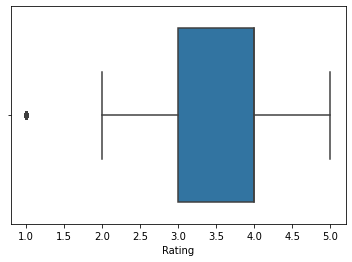

In [30]:
sns.boxplot(data=df1,x='Rating')

<AxesSubplot:xlabel='Age'>

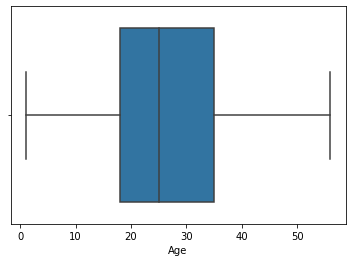

In [31]:
sns.boxplot(data=df1,x='Age')

# BUILD MODEL

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [33]:
from sklearn.linear_model import ElasticNet

In [34]:
model=ElasticNet()

In [35]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [38]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [39]:
y_pred = grid_model.predict(X_test)

In [47]:
y_pred

array([3.62611315, 3.61078882, 3.44679636, ..., 3.39339999, 3.65414481,
       3.83191705])

In [42]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [43]:
mean_squared_error(y_test,y_pred)

0.9903630267315315

In [44]:
mean_absolute_error(y_test,y_pred)

0.8083860839063464

In [45]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.9951698481824756

In [46]:
0.9945540542580158/y_test.mean()

0.27695740859315393

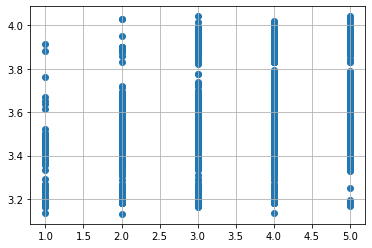

In [54]:
plt.scatter(y_test,y_pred)
plt.grid()
plt.show()